In [1]:
import math
import numpy as np              
import matplotlib.pyplot as plt 
from matplotlib import image

In [2]:
def process_image(this_image,y_range):
    """ Take an RGB image and output 1D data by iterating across colors
    and the y-axis of the image. It assumes that the diffracted orders are to
    the right of the image of the slit. 
    
    Arguments:
        this_image - The RGB image to be processed
        y_range - the range in y to integrate over (determined by height of slit)
    Outputs:
        x - 1D array, starting at 0, with the same length as y
        y - 1D array holding integrated spectrometer data. y[0] is the point 
        which has the highest intensity, which should be the center of the image of the slit
    """
    tmp = np.sum(this_image,2)   # Sum over colors
    y = np.sum(tmp[y_range,:],0) # Sum along y-axis
    x0 = np.argmax(y) # Find center of slit
    y = y[x0:] # Crop data left of slit
    x = np.arange(0,np.size(y)) # Generate x
    return x,y

In [3]:
def calibrate_lambda(x,LAMBDA,ref_x,ref_lambda,theta_i=36.4, order=1):
    """ Calibrate the spectrometer based on an image where a peak of a known 
    wavelength is observed 
    
    Arguments:
        x - 1D array, the raw x positions from the spectrometer
        LAMBDA - The periodicity of the diffraction grating
        ref_x - The x-position of the peak of known wavelength
        ref_lambda - the wavelength, in nm, of the known peak
        theta_i - The angle of the grating relative to the slit in degrees.
        The default is 36.4 degrees
        order - order of diffraction. Default = 1
    Outputs:
        lambda_x - the mapping of x to wavelength in nm, where lambda_x[i] is 
        the wavelength corresponding to position x[i]
    """
    LAMBDA = 2*LAMBDA/order # emperical calibration factor

    theta_i = theta_i*math.pi/180 # Convert to radians 
    theta_d = np.arcsin(np.sin(theta_i)+ref_lambda/LAMBDA) # Angle that ref_lambda diffracts at
    theta_obs = theta_d-theta_i 
    print(theta_obs)
    # Scale factor which accounts for the length of the spectrometer and  magnification of camera
    scale_fact = ref_x/(np.tan(theta_obs));
    
    theta = np.arctan(x/scale_fact); # Observed angle corresponding to each x position 
    theta_d = theta+theta_i; # Diffracted angle corresponding to each x position 
    lambda_x = (np.sin(theta_d)-np.sin(theta_i))*LAMBDA; # wavelength corresponding to each x position 
    return lambda_x

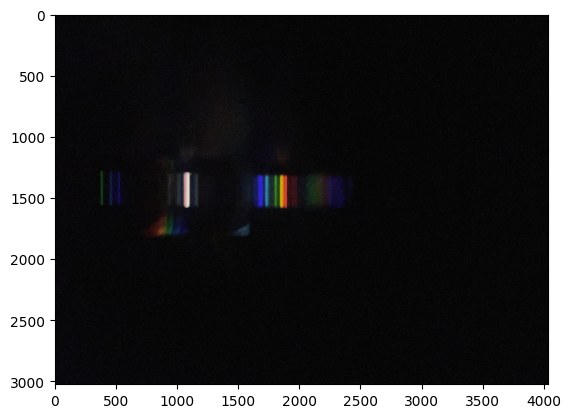

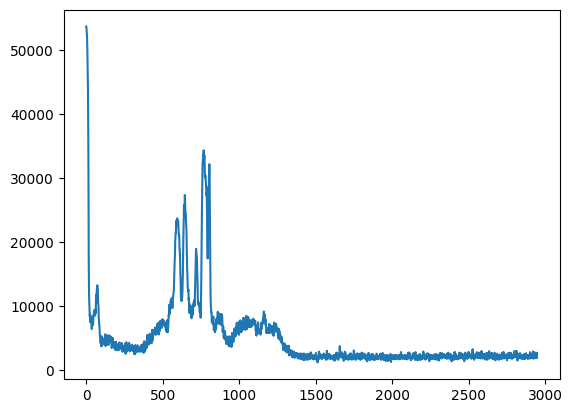

In [22]:
spectrum = image.imread('spectrum/fluorescent_100um.jpg') # 100μm is most precise
LAMBDA = 2000    # Grating pitch in nm 

# Convert image to 1D data
# this_image = np.transpose(this_image,(1,0,2)) # only transpose 50μm
spectrum = np.flip(spectrum,1) # Make sure diffraction peaks are right of slit 
plt.figure()
plt.imshow(spectrum)
plt.savefig('plots/spectrum.png')
x,y = process_image(spectrum,range(1500,1600)) # Range is based on height of slit
plt.figure()
plt.plot(x,y)
plt.savefig('plots/intensity.png')

Calibrate Wavelength

0.18308631871103398


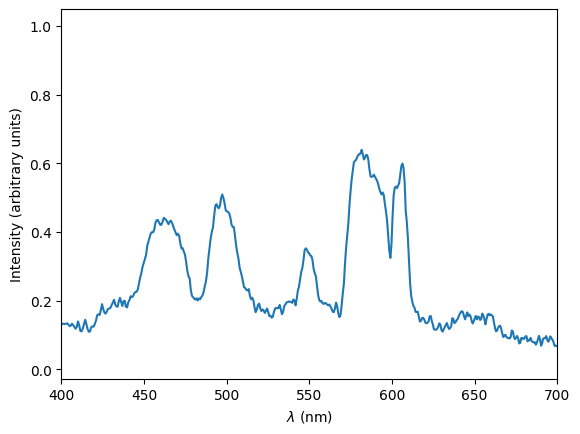

In [24]:
theta_i = 36.4   # Grating angle in degrees
ref_lambda = 546.5 # Known for this sample
# ref_x_50 = 729      # Determined by zooming in on plot
ref_x = 716      
order = 1        # Diffraction order

lambda_x = calibrate_lambda(x,LAMBDA,ref_x,ref_lambda,theta_i,order)

plt.figure()
plt.plot(lambda_x,y/max(y))
plt.xlim({400, 700})
plt.xlabel('$\\lambda$ (nm)')
plt.ylabel('Intensity (arbitrary units)')
plt.savefig('plots/calibration.png')
plt.show()

Quantum Dots

In [31]:
g = 'quantum_dots/green.jpg'
o = 'quantum_dots/orange.jpg'
r1 = 'quantum_dots/red_1.jpg'
r2 = 'quantum_dots/red_2.jpg'

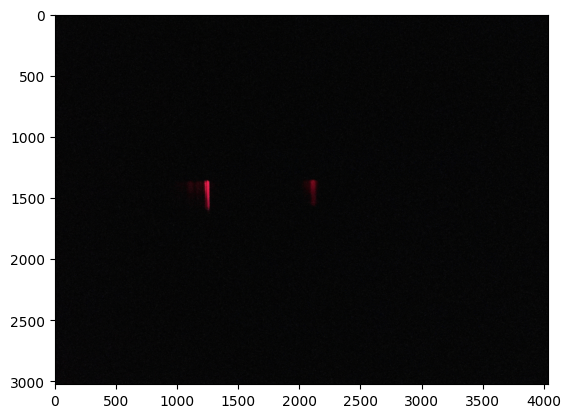

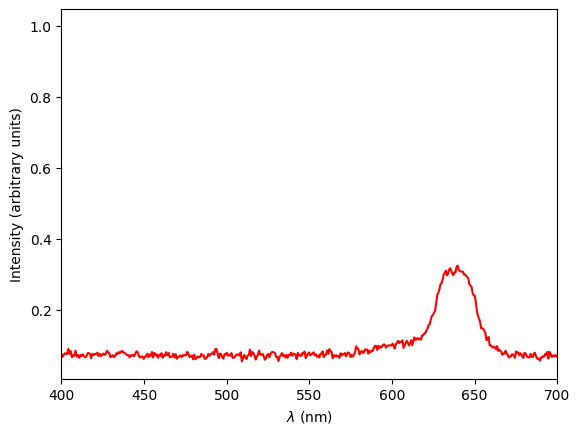

In [42]:
this_image = image.imread(r1)
this_image = np.flip(this_image,1) 
plt.figure()
plt.imshow(this_image)
plt.savefig('plots/red1.png')
_,y = process_image(this_image,range(1345,1615))

plt.figure()
plt.plot(lambda_x[:1000],y[:1000]/max(y),color='r')
plt.xlim({400, 700})
plt.xlabel('$\\lambda$ (nm)')
plt.ylabel('Intensity (arbitrary units)')
plt.savefig('plots/red1_intensity.png')
plt.show()

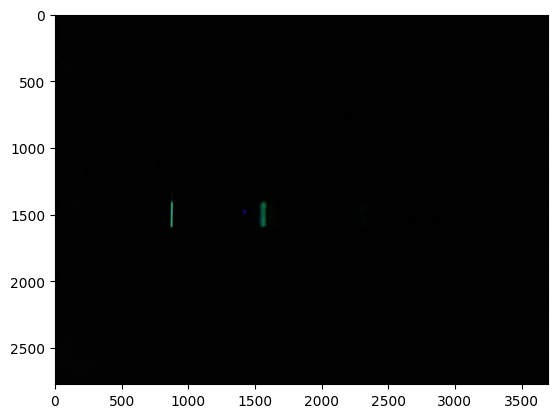

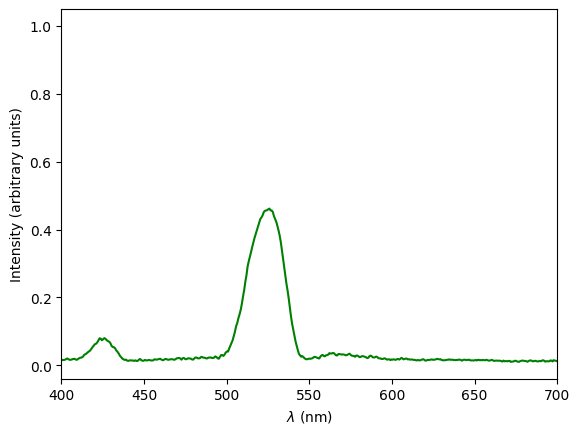

In [43]:
this_image = image.imread(g)
this_image = np.transpose(this_image,(1,0,2))
this_image = np.flip(this_image,1) # Make sure diffraction peaks are right of slit
plt.figure()
plt.imshow(this_image)
plt.savefig('plots/green.png')
_,y = process_image(this_image,range(1390,1600)) # Range is based on height of slit

plt.figure()
plt.plot(lambda_x[:1000],y[:1000]/max(y),color='g')
plt.xlim({400, 700})
plt.xlabel('$\\lambda$ (nm)')
plt.ylabel('Intensity (arbitrary units)')
plt.savefig('plots/green_intensity.png')
plt.show()

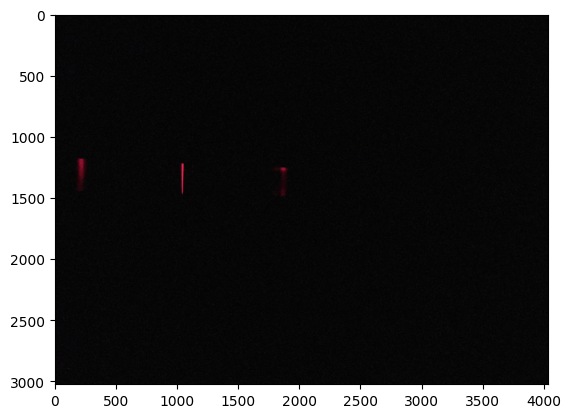

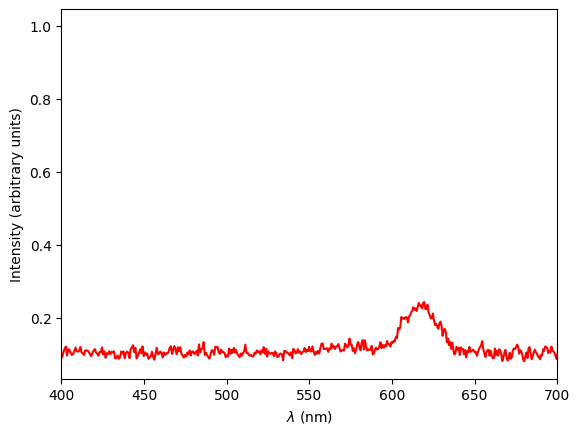

In [44]:
this_image = image.imread(r2)
this_image = np.flip(this_image,1)
plt.figure()
plt.imshow(this_image)
plt.savefig('plots/red2.png')
_,y = process_image(this_image,range(1345,1615))

plt.figure()
plt.plot(lambda_x[:1000],y[:1000]/max(y),color='r')
plt.xlim({400, 700})
plt.xlabel('$\\lambda$ (nm)')
plt.ylabel('Intensity (arbitrary units)')
plt.savefig('plots/red2_intensity.png')
plt.show()

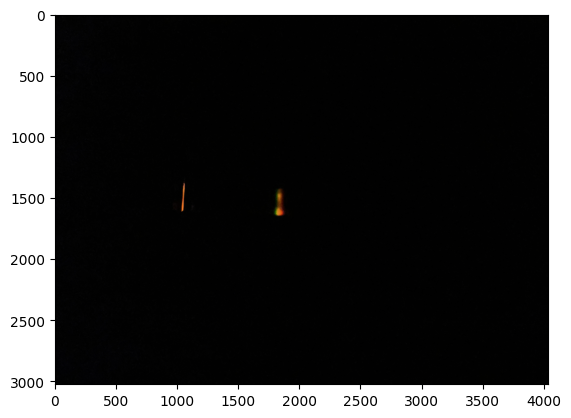

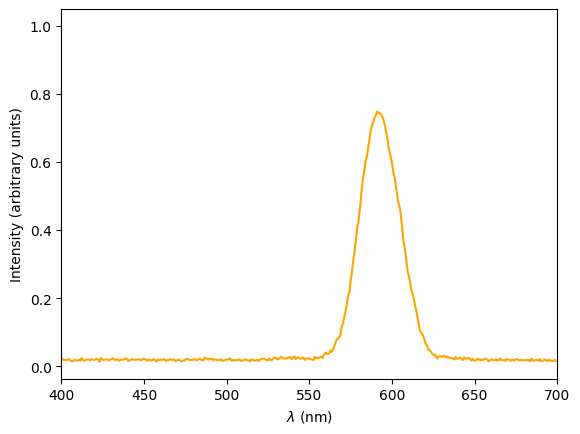

In [45]:
this_image = image.imread(o)
this_image = np.transpose(this_image,(1,0,2))
this_image = np.flip(this_image,1)
plt.figure()
plt.imshow(this_image)
plt.savefig('plots/orange.png')
_,y = process_image(this_image,range(1360,1650))

plt.figure()
plt.plot(lambda_x[:1000],y[:1000]/max(y),color='orange')
plt.xlim({400, 700})
plt.xlabel('$\\lambda$ (nm)')
plt.ylabel('Intensity (arbitrary units)')
plt.savefig('plots/orange_intensity.png')
plt.show()

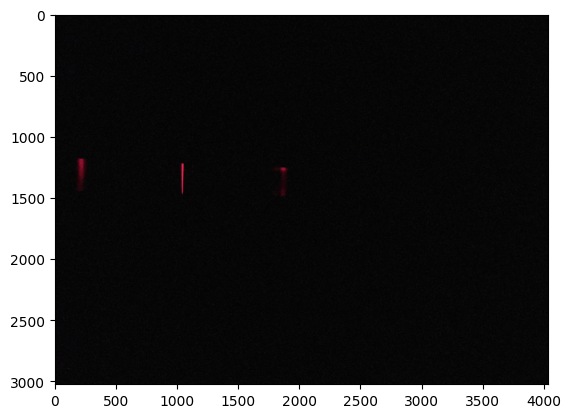

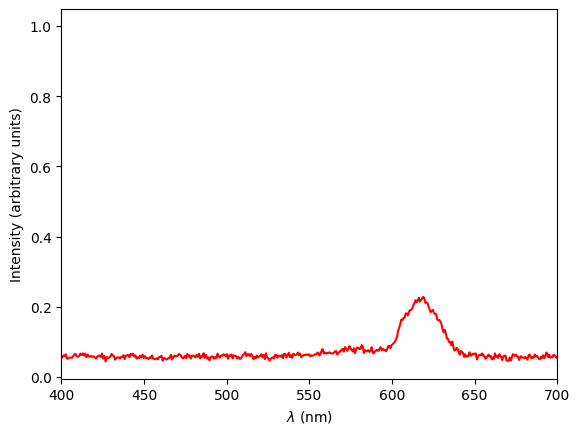

In [18]:
this_image = image.imread(r2)
this_image = np.flip(this_image,1) 
plt.figure()
plt.imshow(this_image)
_,y = process_image(this_image,range(1200,1490))

plt.figure()
plt.plot(lambda_x[:1000],y[:1000]/max(y),color='r')
plt.xlim({400, 700})
plt.xlabel('$\\lambda$ (nm)')
plt.ylabel('Intensity (arbitrary units)')
plt.show()